Ses tanıma



In [ ]:
import soundfile
soundfile.info("speech recognition_sr_1_example_sound.wav")


speech recognition_sr_1_example_sound.wav
samplerate: 22050 Hz
channels: 1
duration: 4.896 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]

In [ ]:
import librosa
import librosa.display

signal, sampling_rate=librosa.load("speech recognition_sr_1_example_sound.wav",sr=None)

In [ ]:
signal
signal.shape

(107957,)

In [ ]:
from IPython import display
display.Audio(signal, rate=sampling_rate)

In [ ]:
import sys
import numpy as np
np.set_printoptions(threshold=np.inf)

print(signal)
print(signal.shape)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
print(sampling_rate)
#ör oran
print(107957 / sampling_rate)

22050
4.8960090702947845


<Figure size 432x288 with 0 Axes>

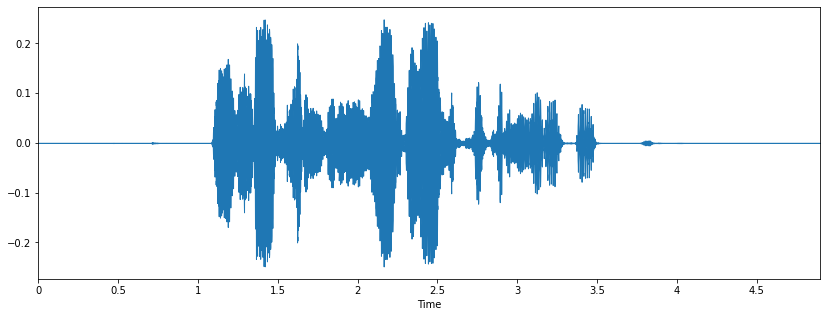

In [ ]:
#okunan veri çizimi
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y=signal, sr=sampling_rate)

Öznitelikler:
STFT yöntemi ile sinyali işle, kolay okunabilen bizim istediğimiz formata dönüştür.
(görsel)

Kullanılan Öznitelikler:
Spectrogram
Mel-spectrogram
Chromagram



In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.ioff()

import numpy as np

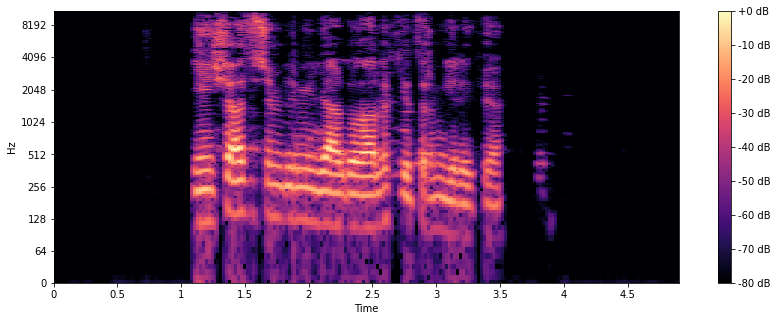

In [ ]:
spec = np.abs(librosa.stft(signal))
spec = librosa.amplitude_to_db(spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(spec, sr=sampling_rate, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

**Mel-spectrogram
düşük frekanslı sesleri daha iyi duyarız.
mel ölçekli spectrogram.

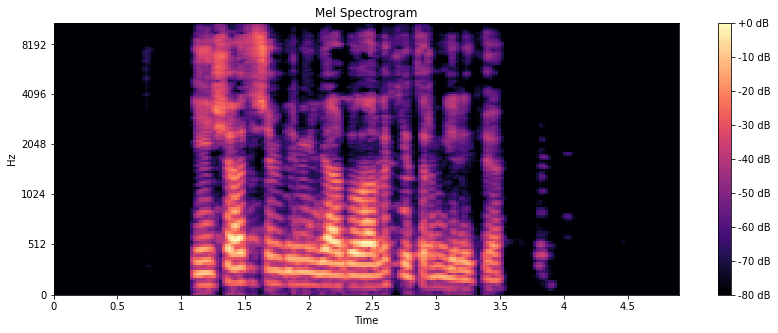

In [ ]:
mel_spect = librosa.feature.melspectrogram(y=signal, sr=sampling_rate)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

Chromagram
ses perde sınıflandırma, fazla kullanılmaz.

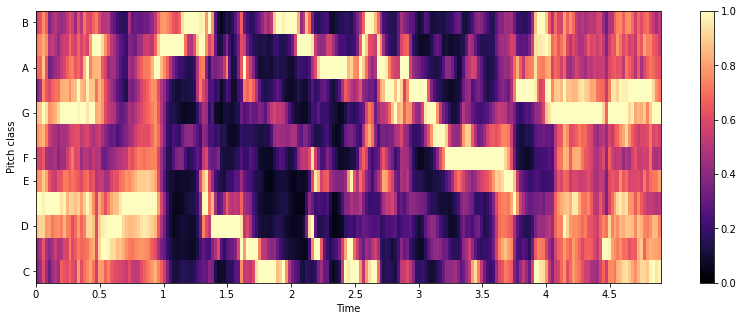

In [ ]:
C = librosa.feature.chroma_cqt(y=signal, sr=sampling_rate, bins_per_octave=36)

plt.figure(figsize=(14,5))
librosa.display.specshow(C, sr=sampling_rate, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.colorbar()

** Mel-Frequency Cepstral Coefficients

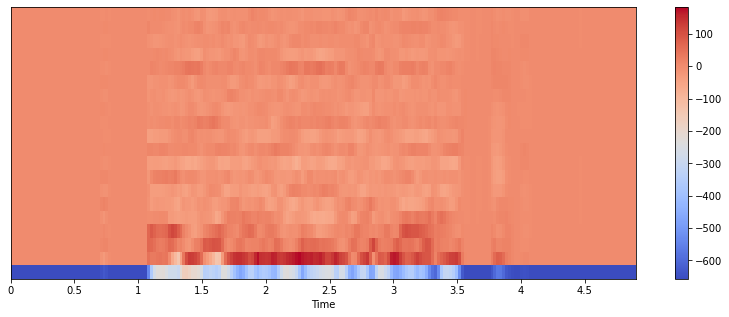

In [ ]:
s

In [ ]:
#veri setleri : 1. openslr librispeech (https://www.openslr.org/) 2. common voice (https://commonvoice.mozilla.org/en/datasets)

Veri Çoğaltma
Bilgisayarlı görü (computer vision) / Doğal dil işleme (natural language processing) / Konuşma Tanıma (Speech Recognition)

#speech augment metodu ile konuşma tanımada veri artırılır.

In [ ]:
#Kendi sesim ile deneme 1
#2.PART
#SESİN KADIN VEYA ERKEK OLDUĞUNU AYIRIMI 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import torch
import torchvision
import torch.nn as nn
from torch.optim import lr_scheduler
from torchvision import datasets, models
from torch.utils.data import Dataset, DataLoader

import time
import os
import copy
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

**Veri kümesinin oluşturulması**
-df.dropna(subseu=['gender']) şeklinde yazılan kısım gender kısmındaki null değerler haricini alacaktır. 

In [ ]:
class VoiceDataset(Dataset):
  def __init__(self,csv_path):
    df=pd.read_table(csv_path)
    self.df=df.dropna(subset=['gender'])

    self.wav_folder="clips"
    self.classes={'female':0,'male':1}
    self.mel_limit=256

  def __len__(self):
    return len(self.df)
    
  def __getitem__(self,idx):
    wav_name=self.df.iloc[idx].path
    wav_path=os.path.join(self.wav_folder,wav_name)

    label=self.df.iloc[idx].gender
    label=self.load_sound(wav_path)
    feature=self.load_sound(wav_path)
    return {'data':feature,'label':label}

    return feature,label
  def load_sound(self,path):
    signal, sampling_rate=librosa.load(path, sr=None)
    mel_spectrogram =librosa.feature.melspectrogram(signal,sampling_rate)
    mel_spectrogram =torch.from_numpy(mel_spectrogram)

    length=mel_spectrogram.shape[1]
    n_mels=mel_spectrogram.shape[0]

    if length < self.mel_limit:
      pad_tensor=torch.zeros((n_mels, self.ml_limit - length))
      mel_spectrogram=torch.cat((mel_spectrogram,pad_tensor),1)
    mel_spectrogram =mel_spectrogram[:,:self.mel_limit]
    return mel_spectrogram.unsqueeze(0)
    
train_dataset=VoiceDataset("/cv-corpus-12.0-delta-2022-12-07.zip/cv-corpus-12.0-delta-2022-12-07/tr/validated.tsv")
train_dataloader=DataLoader(train_dataset,batch_size=4,shuffle=True)

val_dataset=VoiceDataset("/cv-corpus-12.0-delta-2022-12-07.zip/cv-corpus-12.0-delta-2022-12-07/tr/validated.tsv")
val_dataloader=DataLoader(val_dataset,batch_size=4,shuffle=True)

dataloaders={'train':train_dataloader,
             'val':val_dataloader
             }
  
data_sizes={'train':len(train_dataset),
            'val': len(val_dataset)
            }

sample=next(iter(train_dataset))
print(sample)

**Veri kümesinin incelenmesi**

In [ ]:
print("number of train sample: {}".format(len(train_dataset)))
print("number of val sample: {}".format(len(val_dataset)))



In [ ]:
#durations=[]
#for path in tqdm(train_dataset.df.path):
#  y, sr=librosa.load(os.path.join(train_dataset.wav_folder, path))
#  dur=librosa.get_duration(y,sr)
#  durations.append(dur)

#pd.DataFrame(durations).hist()

In [ ]:
print(train_dataset.df.gender.hist())

**Eğitim**

In [ ]:
device=torch.device("cuda:0")

In [ ]:
class VoiceModel(nn.Module):
  def __init__(self):
    super(VoiceModel, self).__init__()

    self.feature = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),

        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),

        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2),
    )

    self.classifier = nn.Sequential(
        nn.Linear(12,128),#shape  te çıkan sonuç 12 yerine gelecek
        nn.ReLU(),
        nn.Linear(128,2)
    )

    def forward(self, inputs):
      x=self.feature(inputs)
      x=torch.flatten(x,1)
      print(x.shape)  
      x=self.classifier(x)
      return x

model  =VoiceModel().to(device)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(25):
  print(f"Epoch : {epoch}")
  print("-"*10)

  for phase in ['train', 'val']:
    if phase =='train':
        model.train()
    else:
      model.eval()

    running_loss=0
    running_corrects=0

    for batch in tqdm(dataloaders[phase]):
      inputs = batch['data'].to(device)
      labels=batch['label'].to(device)

      optimizer.zero_grad()

      outputs=model(inputs)
      _, preds=torch.max(outputs , 1)
      loss  = criterion(outputs, labels)

      if phase =='train':
        loss.backward()
        optimizer.step()
      
      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss=running_loss/data_sizes[phase]
    epoch_acc=running_corrects/data_sizes[phase]

    print('loss:{} | accuracy: {}'.format(epoch_loss, epoch_acc))